# Versionado con Git y DVC

Antes de que la IA fuera popular se tenia la necesidad de tener un control de versiones para el codigo y documentos, para esto se creo Git y de primera instancia hoy puede ayudarnos tambien con los el codigo de ML. Pero, hay un gran problema cuando se trata de versionar grandes volumenes de datos y en este caso no puede realizarlo Git debido a sus limitaciones.
Aqui es donde entra DVC y aun que lo unico que realiza de inicio es generar hash de los archivos, este se ha integrado bastante bien con Git que pareciera que minimiza la información, aun que la realidad es que requiere de un componente mas, un repositorio que si hacepta archivos grandes como S3 de AWS.
¿Como funciona?
1. Git guarda toda la informacion de tamaño menor a 200M
2. DVC genera un Hash de los archivos enormes y lo guarda en un archivo .dvc que se versiona y almacena en Git
3. En DVC se configura el repositorio externo como un bucket de S3
4. Cuando se versiona con DVC adicional a generar el hash tambien se crea en el historial el archivo modificado que se enviara al bucket en el cual se guardara en un directorio del mismo nombre que el hash
5. cuando se quiere recuperar por que se elimino o se quiere descargar en otra maquina, se recupera la informacion de git y tambien de DVC (el bucket S3)

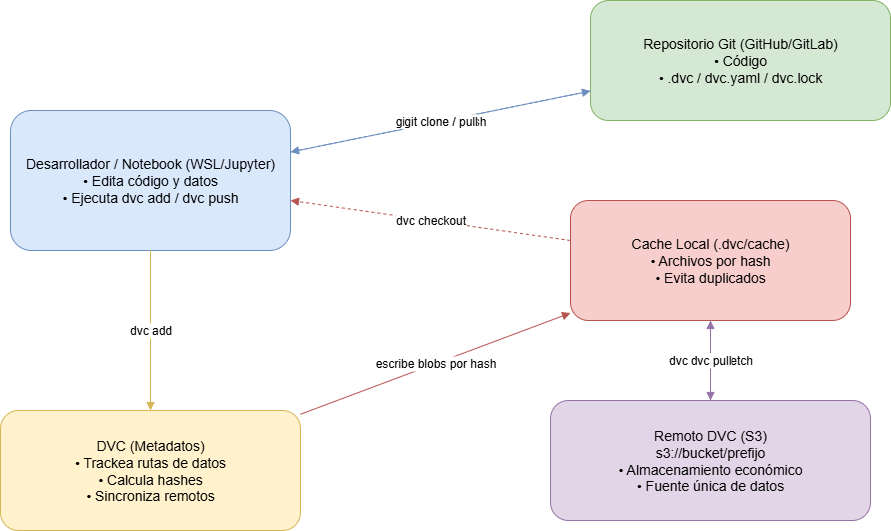

In [1]:
# Si nuestro Jupyter Notebook inicia en el directorio MLOps/Notebooks, ejecutamos esta celda (No necesario pero recomendable) descomentando la linea 3
!ls
#%cd ..
!pwd

Fase1.ipynb  steel_energy_modified.csv	utils.py
fase1	     steel_energy_original.csv	versionado.ipynb
/mnt/c/Users/ivan2/MaestriaIAA/MLOps/MLOps/notebooks


In [6]:
!eval "$(ssh-agent -s)"

Agent pid 16359


In [7]:
!ssh-add ~/.ssh/id_ed25519

Could not open a connection to your authentication agent.


In [8]:
!git status

On branch ivan
Your branch is up to date with 'origin/ivan'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   README.md
	modified:   data/interim/steel_energy_modified.csv
	modified:   data/raw/steel_energy_original.csv
	modified:   notebooks/Fase1.ipynb
	modified:   notebooks/steel_energy_modified.csv
	modified:   notebooks/steel_energy_original.csv
	modified:   notebooks/utils.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	notebooks/.ipynb_checkpoints/
	notebooks/versionado.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [9]:
# Crear un archivo `.gitignore`
!touch .gitignore

In [10]:
# Agregar los archivos que no queremos seguir con Git

!echo ".ipynb_checkpoints/" >> .gitignore
!echo ".log/" >> .gitignore
!echo ".DS_Store" >> .gitignore

In [20]:
!git status

On branch ivan
Your branch is up to date with 'origin/ivan'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   notebooks/versionado.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [12]:
!cat .gitignore

.ipynb_checkpoints/
.log/
.DS_Store


In [7]:
!git config --global user.email "ivan2909@hotmail.com"
!git config --global user.name "Ivan Rodriguez Apolinar"

In [17]:
!git add .

In [5]:
!git status

On branch ivan
Your branch is up to date with 'origin/ivan'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   versionado.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [18]:
!git commit -m "Ivan: Se suben cambios personales y prueba desde el notebook 3"

[ivan 402fdd1] Ivan: Se suben cambios personales y prueba desde el notebook 3
 1 file changed, 238 insertions(+), 28 deletions(-)


In [6]:
#!git push
!pwd

/mnt/c/Users/ivan2/MaestriaIAA/MLOps/MLOps


In [7]:
!dvc init

Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


In [8]:
!git status

On branch ivan
Your branch is up to date with 'origin/ivan'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   .dvc/.gitignore
	new file:   .dvc/config
	new file:   .dvcignore

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   notebooks/versionado.ipynb



In [9]:
!git commit -m "Ivan: Se suben cambios de inicializacion de dvc"

[ivan 644e077] Ivan: Se suben cambios de inicializacion de dvc
 3 files changed, 6 insertions(+)
 create mode 100755 .dvc/.gitignore
 create mode 100755 .dvc/config
 create mode 100755 .dvcignore


In [10]:
!git status

On branch ivan
Your branch is ahead of 'origin/ivan' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   notebooks/versionado.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [12]:
!git rm -r --cached 'data/raw/steel_energy_original.csv'
!dvc add data/raw/steel_energy_original.csv

rm 'data/raw/steel_energy_original.csv'
⠋ Checking graph
Adding...                                                                       
!
                                                                                
!
  0% Checking cache in '/mnt/c/Users/ivan2/MaestriaIAA/MLOps/MLOps/.dvc/cache/fi
                                                                                
!
  0%|          |Adding data/raw/steel_energy_original.0/1 [00:00<?,     ?file/s]
                                                                                
!
  0%|          |Checking out /mnt/c/Users/ivan2/Maestr0/1 [00:00<?,    ?files/s]
100% Adding...|████████████████████████████████████████|1/1 [00:00,  3.56file/s]

To track the changes with git, run:

	git add data/raw/.gitignore data/raw/steel_energy_original.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true


In [13]:
!git add data/raw/steel_energy_original.csv.dvc
!git commit -m "Ivan: Se versionan los datos con DVC 1"

[ivan ed1f905] Ivan: Se versionan los datos con DVC 1
 2 files changed, 6 insertions(+), 35041 deletions(-)
 delete mode 100644 data/raw/steel_energy_original.csv
 create mode 100644 data/raw/steel_energy_original.csv.dvc


In [15]:
!git add data/raw/.gitignore
!git commit -m "Ivan: Se agregar archivo .gitignore de datos"

[ivan 6db78bf] Ivan: Se agregar archivo .gitignore de datos
 1 file changed, 1 insertion(+)
 create mode 100644 data/raw/.gitignore


In [19]:
!git status

On branch ivan
Your branch is ahead of 'origin/ivan' by 4 commits.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


In [21]:
!aws --version

aws-cli/2.31.13 Python/3.13.7 Linux/6.6.87.2-microsoft-standard-WSL2 exe/x86_64.ubuntu.24


In [22]:
!dvc remote add -d s3repo s3://mlops-dvc-storage-ivan/data

Setting 's3repo' as a default remote.


In [41]:
import sys
print("PY:", sys.executable)
# Doctor y push con el mismo intérprete del kernel:
!{sys.executable} -m dvc doctor
!{sys.executable} -m dvc push -v

PY: /home/ivan/proyectos/mlops/.mlopstec/bin/python
DVC version: 3.63.0 (pip)
-------------------------
Platform: Python 3.11.9 on Linux-6.6.87.2-microsoft-standard-WSL2-x86_64-with-glibc2.39
Subprojects:
	dvc_data = 3.16.12
	dvc_objects = 5.1.2
	dvc_render = 1.0.2
	dvc_task = 0.40.2
	scmrepo = 3.5.2
Supports:
	http (aiohttp = 3.13.0, aiohttp-retry = 2.9.1),
	https (aiohttp = 3.13.0, aiohttp-retry = 2.9.1),
	s3 (s3fs = 2025.9.0, boto3 = 1.40.49)
Config:
	Global: /home/ivan/.config/dvc
	System: /etc/xdg/dvc
Cache types: hardlink, symlink
Cache directory: 9p on C:\
Caches: local
Remotes: s3
Workspace directory: 9p on C:\
Repo: dvc, git
Repo.site_cache_dir: /var/tmp/dvc/repo/2cc292271b6c708a61c4cbe4ec3a9c1f
2025-10-10 17:45:45,624 DEBUG: v3.63.0 (pip), CPython 3.11.9 on Linux-6.6.87.2-microsoft-standard-WSL2-x86_64-with-glibc2.39
2025-10-10 17:45:45,624 DEBUG: command: push -v
2025-10-10 17:45:46,289 DEBUG: Preparing to transfer data from '/mnt/c/Users/ivan2/MaestriaIAA/MLOps/MLOps/.dvc/c

In [45]:
!{sys.executable} -m dvc pull

Fetching
!
  0% Checking cache in '/mnt/c/Users/ivan2/MaestriaIAA/MLOps/MLOps/.dvc/cache/fi
Fetching                                                                        
Building workspace index                              |2.00 [00:00,  494entry/s]
Comparing indexes                                    |4.00 [00:00, 2.12kentry/s]
Applying changes                                      |1.00 [00:00,  15.2file/s]
A       data/raw/steel_energy_original.csv
1 file added
